# The Poisson Problem
$$\begin{align*}
-\nabla\cdot(A\cdot\nabla u) &= -cu + f\label{eq:general_poisson}\tag{1}\\
x\in\Omega & \subset\mathbb{R}^n\:(n=1,2,3)\\
A(x) & \in \mathbb{R}^n\\
c(x) & \in \mathbb{R}^n\\
f(x) & \in \mathbb{R}^n \\
u: \Omega & \to\mathbb{R}\end{align*}$$ We will consider three types of boundary conditions on $\partial\Omega$. 

**Dirichlet boundary conditions** are $u(x) = g_D(x)$, prescribed on some portion of the boundary.  **Von Neumann bounday conditions** are $\vec{n}\cdot\nabla u = g_N(x)$, prescribed on some portion of the boundary $\Gamma_N$. **Robin/Robinson boundary conditions** are $\vec{n}\cdot\nabla u + h(x)u(x) = g_R(x)$, prescribed on $\Gamma_R$.

## "Toy" Poisson Problem

If $A(x)=-I$, the Poission problem ($\ref{eq:general_poisson}$) reduces to: $$\begin{align*}-\nabla\cdot\nabla u = 0\label{eq:toy_poisson}\tag{2}\end{align*}$$


---

# Finite Difference Methods

If $\Omega\subset\mathbb{R}^n$, the toy problem ($\ref{eq:toy_poisson}$) can be expressed with Dirichlet boundary conditions as $$\begin{align*}-\Delta u &= f \text{ in }\Omega\\u(x) &= g(x) \text{ on }\partial\Omega\end{align*}$$

The goal of finite difference methods is to approximate the solution $u(x)$ with a point-wise discretization $\tilde{u}(x_i)$. We can do this by using the definition of a derivative $$\frac{du}{dx} = \lim_{h\to 0}\frac{u(x+h)-u(x-h)}{h}$$ and obtaining an approxmiation for $\frac{du}{dx}$ by fixing $h<1$ to be some small value. We can repeat the process and obtain an approximation for $\frac{d^2u}{dx^2}$:
<a id="FDM_key_idea"></a>
<div class="alert alert-block alert-success" style="color:black">  
    For $x\in\mathbb{R}$, $u\in C^4([x-h, x+h])$, and $h\lt 1$,$$\begin{gather*}\delta^2_hu = \frac{u(x+h)-2u(x)+u(x-h)}{h^2}\\\frac{d^2u}{dx^2} = \delta^2_hu + Ch^2 \text{ for some } C\leq\frac{1}{12}\|\frac{d^4u}{dx^4}\|_\infty\end{gather*}$$  
</div>
This process can be applied in multiple dimensions at once to discretize $\Delta = \partial^2_x + \partial^2_y$.

---
## Example: FDM in 1D
We will solve the toy poisson problem with $\Omega=[0,1]\subset\mathbb{R}$ and $g(x) = 0$, $f(x) = 1$ both analytically and numerically.

Analytically solving $-u''(x) = \;\; u(0)=u(1)=0$ is simple enough via direct integration: $$u(x) = \frac{-x^2}{2} + \frac{x}{2}$$

Numerically, we can use a finite difference scheme to "chop up" $\Omega$ into small, equally-sized intervals of width $h$, and then use $\delta^2_h$ to find a solution.

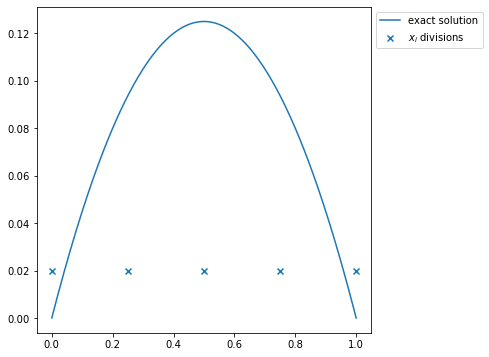

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc, cm
rc("figure", figsize=(6,6))
import numpy as np
N = 4 # the number of intervals to cut [0,1] into
x_i = np.linspace(0,1,N+1) # cut [0,1] into N equally sized intervals
h = 1/N
u_exact = lambda t: -0.5*t**2 + 0.5*t # note down the exact solution

fig, ax = plt.subplots()
# plot the exact solution
ax.plot((x := np.linspace(0,1,201)),u_exact(x),label="exact solution")
# plot the divisions
ax.scatter(x_i, [0.02]*x_i.shape[0],label="$x_i$ divisions",marker='x')
_ = ax.legend(bbox_to_anchor=(1,1),loc='upper left') 

Since we have already divided $\Omega$ into $N$ intervals $[x_i,x_{i+1}]$ of width $h=\frac{1}{N}$, we can use the defiintion [$\delta^2_h$](#FDM_key_idea) to obtain the following: $$\begin{align*} \delta^2_h u(x_i) &= \frac{u(x_{i-1})-2u(x_i)+u(x_{i+1})}{h^2}\\&= 1\end{align*}$$ This generates N linear equations, where $$h^2\begin{pmatrix}1&-2&1\end{pmatrix}\cdot\begin{pmatrix}u(x_{i-1})\\u(x_i)\\u(x_{i+1})\end{pmatrix} = 1$$ for each $u(x_i)$ We can write this system in a concise matrix form $$\frac{1}{h^2} A u(x_i)=f(x_i)$$
Since $u(x_0) = u(x_N) = 0$, this system of equations is solveable for each $u(x_i)$.

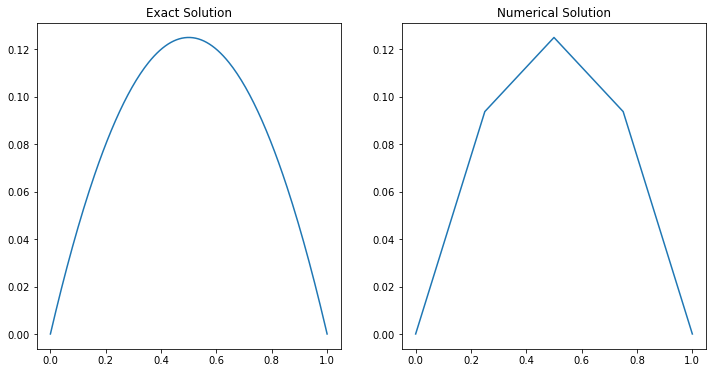

In [2]:
# Generate the RHS matrix
A = np.eye(N+1,k=-1)-2*np.eye(N+1)+np.eye(N+1,k=1)
# Scale by 1/(h**2) to set up the system
A *= 1/(h**2)
b = -1*np.ones((N+1,1)) # Set up the "forcing vector" in the system Au=b

# now we apply the boundary conditions to set u(0) and u(1)
b[(0,N),0] = 0
A[(0,N),:] = 0
A[0,0] = 1
A[N,N] = 1

# and solve the system using gaussian elimination!
u_appx = np.linalg.solve(A,b)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Exact Solution")
ax.plot(x,u_exact(x))
ax = fig.add_subplot(1,2, 2)
ax.set_title("Numerical Solution")
_ = ax.plot(x_i,u_appx)

---

## Example: 2D Finite Difference Methods
We start again from the Poisson problem $$\begin{align*}-\Delta u &= f(x) \text{ for } u\in\Omega\\ u(x)&=0 \text{ on }\partial\Omega\end{align*}$$, however, this time $\Omega=[0,1]\times[0,1]\:\subset\mathbb{R}^2$. In order to guarantee that there is an analytic solution for $u$, we set $f(x, y) = -2\pi^2\sin{\pi x}\cdot\sin{\pi y}$. 

Now we must cut $\Omega$ into squares, rather than simple intervals, in order to replace $\Delta$ with $\delta^2_h$. Therefore, we will divide both the x- and y- axes into $N$ intervals, generating $N^2$ squares.

In [20]:
N=6
h = 1/N
# divide both x and y into N intervals
x_i = np.linspace(0, 1, N+1)
y_j = np.linspace(0, 1, N+1)

We also need to extend $\delta^2_h$ into two dimensions, incorporating the y-direction into our considerations. Since $$\begin{align*}\Delta u &= \partial_x^2u+\partial_y^2u\\&\approx\delta^2_{y,h}u+\delta^2_{x,h}u\\&=\frac{u(x_{i-1},y_j)+u(x_i,y_{j-1})-4u(x_i,y_j)+u(x_{i+1})}{h^2}\end{align*}$$

We can express this as a matrix equation $A\cdot u = b$. $b$ is a $1\times(N+1)^2$ column vector, with $b_{i+(N+1)j} = f(x_i, y_j)$

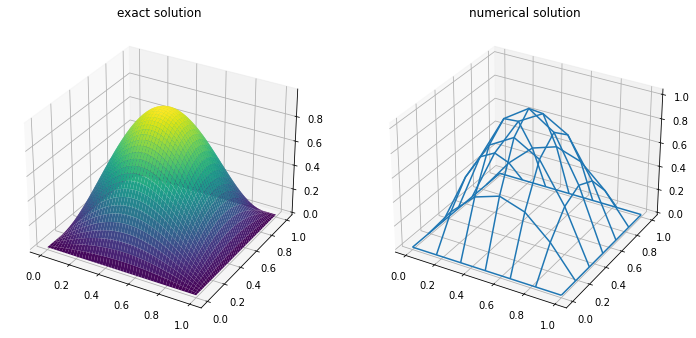

In [21]:
A = np.zeros(((N+1)**2, (N+1)**2))
b = np.zeros(((N+1)**2, 1))
f = lambda x,y: 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

# set the values of b according to the forcing function
for j in range(N+1):
    for i in range(N+1):
        b[i+(N+1)*j] = -f(x_i[i], y_j[j])
        
#Assemble the system matrix using a block method
# A = S I 0
#     I S I
#     0 I S
# with S = -4  1  0
#           1 -4  1
#           0  1 -4
# with the pattern continuing at the N increases

stencil = np.eye(N+1,k=-1)-4*np.eye(N+1)+np.eye(N+1,k=1)
for bx in range(N+1):
    for by in range(N+1):
        if bx == by:
            A[(N+1)*bx:(N+1)*bx+N+1,(N+1)*by:(N+1)*by+N+1] = stencil[:,:]
        elif bx == by-1 or bx == by+1:
            A[(N+1)*bx:(N+1)*bx+N+1,(N+1)*by:(N+1)*by+N+1] = np.eye(N+1)[:,:]
A *= 1/(h**2)
# apply the Dirichlet boundary conditions
for i in range(N+1):
    for j in range(N+1):
        if i == 0 or j== 0 or j == N or i == N:
            idx = (N+1)*j + i
            A[idx,:] = 0
            b[idx,:] = 0
            A[idx,idx] = 1
# solve the system using gaussian elim
# and put it into a 3x3 matrix for plotting
u_ij = np.linalg.solve(A, b).reshape((N+1,N+1))
u1_exact = lambda x,y: np.sin(np.pi*x)*np.sin(np.pi*y)
Xi, Yj = np.meshgrid(x_i, y_j)
X, Y = np.meshgrid(np.linspace(0,1, 200), np.linspace(0,1,200))
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.set_title("exact solution")
ax.plot_surface(X, Y, u1_exact(X, Y), cmap=cm.viridis)
ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.set_title("numerical solution")
_ = ax.plot_wireframe(Xi,Yj,u_ij, cmap=cm.viridis)

---

# Error Analysis of Finite Difference Methods